<a href="https://colab.research.google.com/github/RheyMartt/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [11]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [12]:
target = housing.target

In [13]:
features = housing.data[["Longitude", "Latitude"]]

In [14]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [15]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


In [16]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

<Axes: xlabel='Longitude', ylabel='Latitude'>

In [ ]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [ ]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

In [ ]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

The inertia for k = 1 is: 2.0690172605159725
The inertia for k = 2 is: 0.9919086994399962
The inertia for k = 3 is: 0.2896400340092231
The inertia for k = 4 is: 0.132747199063285
The inertia for k = 5 is: 0.08993069099852923
The inertia for k = 6 is: 0.08088391268087425
The inertia for k = 7 is: 0.04567092271514459
The inertia for k = 8 is: 0.04238498302613978
The inertia for k = 9 is: 0.03416843504376616
The inertia for k = 10 is: 0.022092331374449697


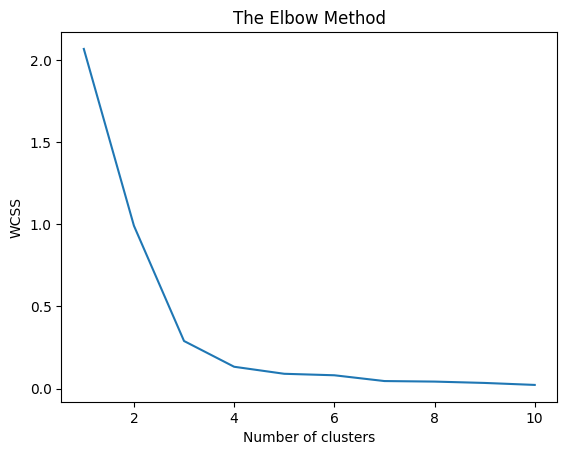

In [24]:
import matplotlib.pyplot as plt # import the pyplot module from matplotlib and alias it as plt


wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto', init = 'k-means++')
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    print("The inertia for k = {} is: {}".format(i, kmeans.inertia_))

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

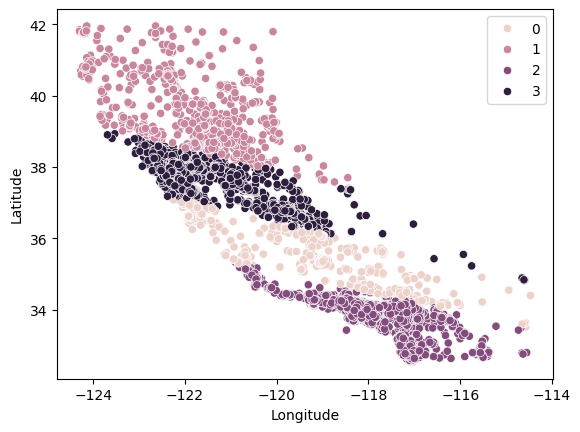

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto', init = 'k-means++')
kmeans.fit(X_train_norm)

sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

In [26]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto', init = 'k-means++')
    kmeans.fit(X_train_norm)

    print("The silhouette score for k = {} is: {}".format(i, silhouette_score(X_train_norm, kmeans.labels_)))

The silhouette score for k = 2 is: 0.651732124587807
The silhouette score for k = 3 is: 0.7953524892052838
The silhouette score for k = 4 is: 0.8259386401030385
The silhouette score for k = 5 is: 0.8289046219321752
The silhouette score for k = 6 is: 0.7877744162371612
The silhouette score for k = 7 is: 0.7866385358662057
The silhouette score for k = 8 is: 0.7793001538742506
The silhouette score for k = 9 is: 0.7741809894944669
The silhouette score for k = 10 is: 0.7727100699471694
